# Application 인증정보

* `Client ID` : 
* `Client Secret` : 
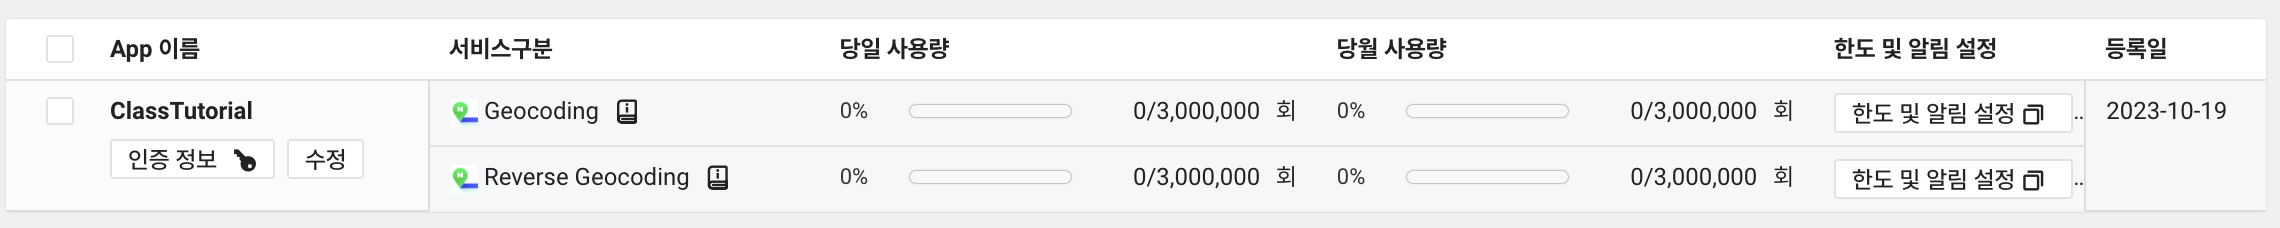
  


## Geocode tutorial

In [76]:
import requests   # https://requests.readthedocs.io/en/latest/

def getGeoCode(address, client_id, client_secret) :
    header = {
        "X-NCP-APIGW-API-KEY-ID" : client_id,
        "X-NCP-APIGW-API-KEY" : client_secret,
    }
    
    endpoint = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode" # https://api.ncloud-docs.com/docs/ai-naver-mapsgeocoding-geocode
    url = f"{endpoint}?query={address}"
    
    res = requests.get(url, headers=header).json() # get 방식으로 json documnet가 날라옴
    
    return res


In [77]:
# https://api.ncloud-docs.com/docs/ai-naver-mapsgeocoding-geocode#%EC%9A%94%EC%B2%AD-%ED%97%A4%EB%8D%94
address = 
client_id = 
client_secret = 

result = getGeoCode(address, client_id, client_secret)

print(f"status code : {result['status']}")
print(f"X : {result['addresses'][0]['x']}") # 경도
print(f"Y : {result['addresses'][0]['y']}") # 경도
print(f"roadAddress : {result['addresses'][0]['roadAddress']}") # 도로명 주소
print(f"jibunAddress : {result['addresses'][0]['jibunAddress']}") # 지번 주소
print(f"englishAddress : {result['addresses'][0]['englishAddress']}") # 영어 주소

print(f"meta : {result['meta']}")


status code : OK
X : 126.7558171
Y : 37.7118282
roadAddress : 경기도 파주시 한빛로 20 롯데캐슬 파크타운 Ⅱ
jibunAddress : 경기도 파주시 야당동 1015 롯데캐슬 파크타운 Ⅱ
englishAddress : 20, Hanbit-ro, Paju-si, Gyeonggi-do, Republic of Korea
meta : {'totalCount': 1, 'page': 1, 'count': 1}


## 공공데이터 포털 Tutorial

* https://www.data.go.kr/index.do

### 한국환경공단_에어코리아_대기오염정보

* https://www.data.go.kr/data/15073861/openapi.do
![스크린샷 2023-10-19 11.24.34.png](<attachment:스크린샷 2023-10-19 11.24.34.png>)

   * endpoint : http://apis.data.go.kr/B552584/ArpltnInforInqireSvc
   * service URL : http://apis.data.go.kr/B552584/ArpltnInforInqireSvc
   * 일반 인증키(Encoding) : 
   * 일반 인증키(Decoding) : 
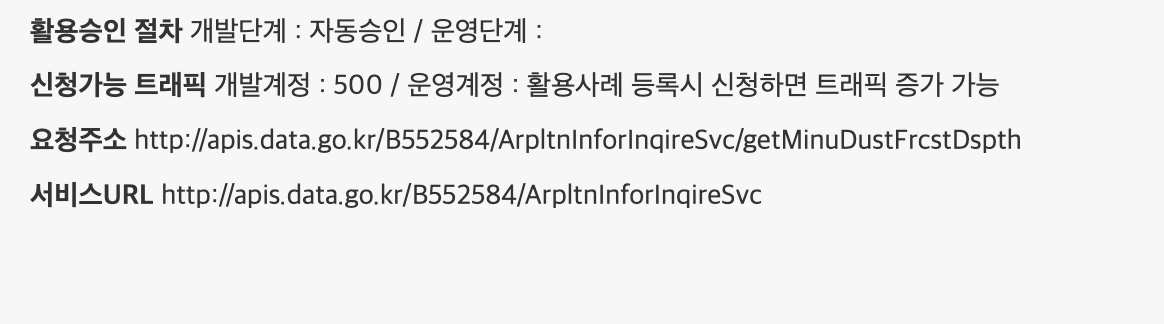

### API document

* 한국환경공단 에어코리아 OpenAPI 기술문서


#### 시도별 실시간 측정정보 조회

https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15073861


In [113]:
import requests

def getAirQualityByCity(city, key, endpoint) : 
    url = endpoint
    params ={
        'serviceKey' : key, 
        'returnType' : 'json', 
        'numOfRows' : '100', 
        'pageNo' : '1', 
        'sidoName' : city,
        'ver' : 1.0
    }

    res = requests.post(url, params=params)
    
    return res


In [122]:
# https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15073861

city = "경기" # (전국, 서울, 부산, 대구, 인천, 광주, 대전, 울산, 경기, 강원, 충북, 충남, 전북, 전남, 경북, 경남, 제주, 세종)
key = 
endpoint = "http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty"

response = getAirQualityByCity(city, key, endpoint) 
print(response.content)

if response.status_code == 200 :
    print("success")
    response_body = response.json()['response']['body']
    for item in response_body['items'] :
        print(f"{item['stationName']}\tPM10 : {item['pm10Value']} ug/m3")
else :
    print("failure")

b'{"response":{"body":{"totalCount":125,"items":[{"so2Grade":"1","coFlag":null,"khaiValue":"77","so2Value":"0.002","coValue":"0.5","pm25Flag":null,"pm10Flag":null,"o3Grade":"2","pm10Value":"42","khaiGrade":"2","pm25Value":"29","sidoName":"\xea\xb2\xbd\xea\xb8\xb0","no2Flag":null,"no2Grade":"1","o3Flag":null,"pm25Grade":"2","so2Flag":null,"dataTime":"2023-10-19 13:00","coGrade":"1","no2Value":"0.007","stationName":"\xeb\x8c\x80\xeb\xb6\x80\xeb\x8f\x99","pm10Grade":"1","o3Value":"0.062"},{"so2Grade":"1","coFlag":null,"khaiValue":"56","so2Value":"0.003","coValue":"0.5","pm25Flag":null,"pm10Flag":null,"o3Grade":"1","pm10Value":"21","khaiGrade":"2","pm25Value":"13","sidoName":"\xea\xb2\xbd\xea\xb8\xb0","no2Flag":null,"no2Grade":"2","o3Flag":null,"pm25Grade":"1","so2Flag":null,"dataTime":"2023-10-19 13:00","coGrade":"1","no2Value":"0.034","stationName":"\xed\x98\xb8\xec\x88\x98\xeb\x8f\x99","pm10Grade":"1","o3Value":"0.010"},{"so2Grade":null,"coFlag":"\xed\x86\xb5\xec\x8b\xa0\xec\x9e\xa5\xec

#### 측정소별 실시간 측정정보 조회

https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15073861

In [124]:
import requests

def getAirQualityByMeasuringStation(stationName, key, endpoint) :
    url = endpoint
    params ={
        'serviceKey' : key, 
        'returnType' : 'json', 
        'numOfRows' : '100', 
        'pageNo' : '1', 
        'stationName' : stationName,
        'dataTerm' : 'MONTH',
        'ver' : 1.0
    }

    res = requests.post(url, params=params)
    
    return res


In [125]:
stationName = "종로구" # 
key = 
endpoint = "http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty"

response = getAirQualityByMeasuringStation(stationName, key, endpoint) 
print(response.content)

if response.status_code == 200 :
    print("success")
    response_body = response.json()['response']['body']
    for item in response_body['items'] :
        print(f"date time : {item['dataTime']}")
else :
    print("failure")

b'{"response":{"body":{"totalCount":719,"items":[{"so2Grade":"1","coFlag":null,"khaiValue":"66","so2Value":"0.003","coValue":"0.7","pm25Flag":null,"pm10Flag":null,"pm10Value":"23","o3Grade":"1","khaiGrade":"2","pm25Value":"18","no2Flag":null,"no2Grade":"2","o3Flag":null,"pm25Grade":"1","so2Flag":null,"dataTime":"2023-10-19 13:00","coGrade":"1","no2Value":"0.040","pm10Grade":"1","o3Value":"0.012"},{"so2Grade":"1","coFlag":null,"khaiValue":"60","so2Value":"0.003","coValue":"0.6","pm25Flag":null,"pm10Flag":null,"pm10Value":"20","o3Grade":"1","khaiGrade":"2","pm25Value":"14","no2Flag":null,"no2Grade":"2","o3Flag":null,"pm25Grade":"1","so2Flag":null,"dataTime":"2023-10-19 12:00","coGrade":"1","no2Value":"0.036","pm10Grade":"1","o3Value":"0.014"},{"so2Grade":"1","coFlag":null,"khaiValue":"61","so2Value":"0.003","coValue":"0.6","pm25Flag":null,"pm10Flag":null,"pm10Value":"17","o3Grade":"1","khaiGrade":"2","pm25Value":"14","no2Flag":null,"no2Grade":"2","o3Flag":null,"pm25Grade":"1","so2Flag":n